In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

In [22]:
PATH = 'ag-sis-2k-learn-stat-init-eta'
df = pd.read_csv('oneshot/results/log-%s.txt' % PATH, sep='\t')
SAMPLE_SIZE = 10

In [23]:
df

,EUBO,ELBO,ESS,KLs_eta_ex,KLs_eta_in,KLs_z_ex,KLs_z_in
0,-1033.769,-1302.778,1.023,975.147,173.992,302.721,40.958
1,-1000.877,-1261.866,1.024,928.219,171.687,287.043,40.174
2,-968.204,-1219.760,1.025,882.579,168.866,271.386,39.347
3,-935.713,-1179.290,1.027,836.797,166.965,256.726,38.577
4,-905.931,-1140.195,1.026,794.289,164.778,243.815,37.849
5,-878.437,-1103.962,1.030,753.717,162.768,227.169,36.849
6,-850.084,-1066.851,1.030,713.446,160.558,215.667,36.017
7,-825.030,-1032.933,1.032,675.818,158.756,201.371,35.050
8,-800.353,-1000.622,1.033,638.934,156.581,188.273,34.169
9,-777.278,-970.219,1.036,605.297,155.329,174.653,33.136


In [24]:
def plot_results_oneshot(df):
    fig = plt.figure(figsize=(15, 15))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
#     ax2.set_yscale('log')
    ax2.plot(df['IWKLs_ex'].values, 'y', label='exclusive KL eta')
    ax2.plot(df['IWKLs_in'].values, 'k', label='inclusive KL eta')
    ax3.plot(df['ESS'].values / SAMPLE_SIZE, 'm', label='ESS')
    ax1.set_ylim([-250, -190])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 20])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('train_' + PATH + '.svg')

In [25]:
def plot_results_ag(df):
    fig = plt.figure(figsize=(10, 10))
    fig.tight_layout()
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    ax1.plot(df['EUBO'].values, 'r', label='EUBOs')
    ax1.plot(df['ELBO'].values, 'b', label='ELBOs')

    ax1.tick_params(labelsize=18)
#     ax2.set_yscale('log')
    ax2.plot(df['KLs_eta_ex'].values, 'y', label='exclusive KL eta')
    ax2.plot(df['KLs_eta_in'].values, 'k', label='inclusive KL eta')
    ax2.plot(df['KLs_z_ex'].values, 'r', label='exclusive KL z')
    ax2.plot(df['KLs_z_in'].values, 'b', label='inclusive KL z')
    ax3.plot(df['ESS'].values / SAMPLE_SIZE, 'm', label='ESS')
    ax1.set_ylim([-400, -240])
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax2.set_ylim([0, 20])
    ax2.tick_params(labelsize=18)
    ax3.tick_params(labelsize=18)
    ax3.set_ylim([0,1])
    plt.savefig('train_' + PATH + '.svg')

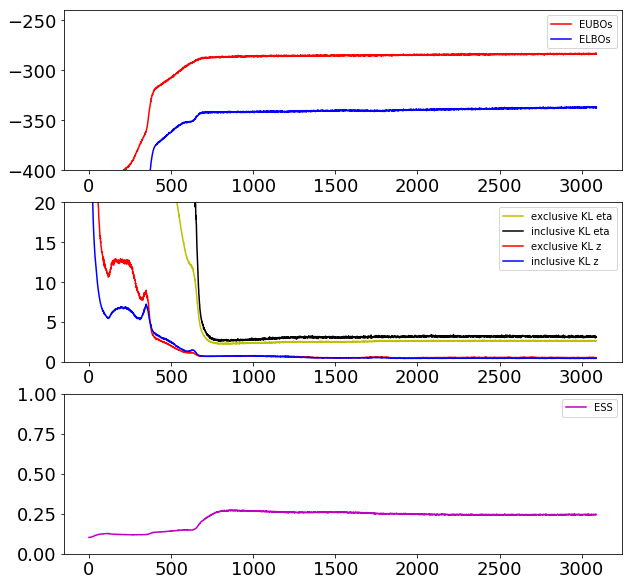

In [26]:
plot_results_ag(df)

In [5]:
df['ESS'].values

array(['2.671', '3.403', '3.906', ..., '5.687', '5.691', '5.689'],
      dtype=object)